# COVID-19 in India

Use covid_19_india.csv to do the following:

● For each Indian state, find maximum cases reported for confirmed, deaths and recovered individually along
with date on which these cases were reported for any three months of year 2020. Display the result in the
self-explanatory format.

● Use appropriate year-month string date conversions for example: Identify the no. of cases on the 6th day of
the month by converting year-month string to dates.

● Create subplots (line graph) for showing total number of cured cases month-wise from April 2020 to March
2021 in four states namely Karnataka, Gujarat, Haryana, and Uttar Pradesh.

● Compare the deaths due to Covid-19 in the months of May 2020 and May 2021 for the states namely
Karnataka, Delhi, and Madhya Pradesh using stacked bars.

● Make a graph to show the month wise relation (Positive/Negative/Neutral) between number of confirmed
Covid-19 cases and Deaths in Uttar Pradesh. Display correlation value too in the graph.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

%matplotlib inline
%matplotlib notebook

In [2]:
covid19_df = pd.read_csv("./datasets/covid_19_india.csv")
individuals_df = pd.read_csv("./datasets/IndividualDetails.csv")

excel_file = pd.ExcelFile("./datasets/Indian States Population and Area.xlsx")
indian_states_df = excel_file.parse('Sheet1')

I am using three different sources of data in this analysis.  

Let us have a look at the first few records from the COVID 19 dataset sourced from Kaggle.

In [3]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid19_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [5]:
covid19_df.shape

(18110, 9)

In [6]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

# PART A
#### For each Indian state, find maximum cases reported for confirmed, deaths and recovered individually along with date on which these cases were reported for any three months of year 2020. Display the result in the self-explanatory format.

In [7]:
start_date='2020-01-01' # range of 3 month
end_date='2020-03-31'
covid19_df_latest = covid19_df[(covid19_df['Date']>start_date) &
                               (covid19_df['Date']<=end_date)]
covid19_df_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [8]:
covid19_df_latest.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
524,525,2020-03-31,8:30 PM,Telengana,-,-,1,1,79
525,526,2020-03-31,8:30 PM,Uttarakhand,-,-,2,0,7
526,527,2020-03-31,8:30 PM,Uttar Pradesh,-,-,14,0,101
527,528,2020-03-31,8:30 PM,West Bengal,-,-,0,2,26
528,529,2020-03-31,8:30 PM,Unassigned,-,-,0,0,38


In [9]:
hi=covid19_df_latest['State/UnionTerritory'].unique()
print(hi)
hi.size

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned']


28

In [10]:
covid19_df_latest['Confirmed'].sum()

9775

In [11]:
covid19_df_latest.groupby(by=['State/UnionTerritory'])['Cured'].max()

State/UnionTerritory
Andaman and Nicobar Islands     0
Andhra Pradesh                  1
Bihar                           0
Chandigarh                      0
Chhattisgarh                    0
Delhi                           6
Goa                             0
Gujarat                         3
Haryana                        21
Himachal Pradesh                0
Jammu and Kashmir               2
Karnataka                       5
Kerala                         19
Ladakh                          3
Madhya Pradesh                  0
Maharashtra                    39
Manipur                         0
Mizoram                         0
Odisha                          0
Puducherry                      0
Punjab                          1
Rajasthan                       3
Tamil Nadu                      4
Telengana                       1
Unassigned                      0
Uttar Pradesh                  14
Uttarakhand                     2
West Bengal                     0
Name: Cured, dtype: int64

In [12]:
covid19_df_latest.groupby(by=['State/UnionTerritory'])['Deaths'].max()


State/UnionTerritory
Andaman and Nicobar Islands    0
Andhra Pradesh                 0
Bihar                          1
Chandigarh                     0
Chhattisgarh                   0
Delhi                          2
Goa                            0
Gujarat                        6
Haryana                        0
Himachal Pradesh               1
Jammu and Kashmir              2
Karnataka                      3
Kerala                         1
Ladakh                         0
Madhya Pradesh                 3
Maharashtra                    9
Manipur                        0
Mizoram                        0
Odisha                         0
Puducherry                     0
Punjab                         3
Rajasthan                      0
Tamil Nadu                     1
Telengana                      1
Unassigned                     0
Uttar Pradesh                  0
Uttarakhand                    0
West Bengal                    2
Name: Deaths, dtype: int64

In [13]:
covid19_df_latest.groupby(by=['State/UnionTerritory'])['Confirmed'].max()


State/UnionTerritory
Andaman and Nicobar Islands     10
Andhra Pradesh                  40
Bihar                           15
Chandigarh                      13
Chhattisgarh                     8
Delhi                           97
Goa                              5
Gujarat                         73
Haryana                         40
Himachal Pradesh                 3
Jammu and Kashmir               54
Karnataka                       83
Kerala                         234
Ladakh                          13
Madhya Pradesh                  47
Maharashtra                    216
Manipur                          1
Mizoram                          1
Odisha                           3
Puducherry                       1
Punjab                          41
Rajasthan                       74
Tamil Nadu                      74
Telengana                       79
Unassigned                      46
Uttar Pradesh                  101
Uttarakhand                      7
West Bengal                     26

In [14]:
covid19_df_latest.groupby(by=['State/UnionTerritory'])
['Cured','Deaths','Confirmed'].max()

C:\Users\UJJAWA~1\AppData\Local\Temp/ipykernel_2404/3048936530.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid19_df_latest.groupby(by=['State/UnionTerritory'])['Cured','Deaths','Confirmed'].max()


,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,0,0,10
Andhra Pradesh,1,0,40
Bihar,0,1,15
Chandigarh,0,0,13
Chhattisgarh,0,0,8
Delhi,6,2,97
Goa,0,0,5
Gujarat,3,6,73
Haryana,21,0,40


In [15]:
covid19_df_latest.groupby(by=['State/UnionTerritory']).max()

,Sno,Date,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
State/UnionTerritory,,,,,,,,
Andaman and Nicobar Islands,503,2020-03-31,9:30 PM,6,0,0,0,10
Andhra Pradesh,502,2020-03-31,9:30 PM,9,0,1,0,40
Bihar,504,2020-03-31,9:30 PM,9,0,0,1,15
Chandigarh,505,2020-03-31,9:30 PM,8,0,0,0,13
Chhattisgarh,506,2020-03-31,9:30 PM,6,0,0,0,8
Delhi,507,2020-03-31,9:30 PM,9,1,6,2,97
Goa,508,2020-03-31,9:30 PM,3,0,0,0,5
Gujarat,509,2020-03-31,9:30 PM,7,1,3,6,73
Haryana,510,2020-03-31,9:30 PM,7,2,21,0,40


# PART B
#### Use appropriate year-month string date conversions for example: Identify the no. of cases on the 6th day of the month by converting year-month string to dates.

In [16]:
import datetime as dt
def read_as_datetime(str_date):
    return dt.datetime.strptime(str_date,'%Y-%m-%d')

In [17]:
case=covid19_df.copy()

In [18]:
case['Date']=case.Date.apply(read_as_datetime)

In [19]:
cas=case[(case['Date'].dt.month==6) & (case['Date'].dt.day==6)]

In [20]:
cas

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2702,2703,2020-06-06,8:00 AM,Andaman and Nicobar Islands,-,-,33,0,33
2703,2704,2020-06-06,8:00 AM,Andhra Pradesh,-,-,2576,73,4303
2704,2705,2020-06-06,8:00 AM,Arunachal Pradesh,-,-,1,0,45
2705,2706,2020-06-06,8:00 AM,Assam,-,-,498,4,2153
2706,2707,2020-06-06,8:00 AM,Bihar,-,-,2225,29,4596
...,...,...,...,...,...,...,...,...,...
15729,15730,2021-06-06,8:00 AM,Telangana,-,-,557162,3364,589734
15730,15731,2021-06-06,8:00 AM,Tripura,-,-,48195,558,55234
15731,15732,2021-06-06,8:00 AM,Uttarakhand,-,-,309609,6664,333578
15732,15733,2021-06-06,8:00 AM,Uttar Pradesh,-,-,1656763,21151,1697352


In [21]:
cas[['Date','State/UnionTerritory','Confirmed']].head()

,Date,State/UnionTerritory,Confirmed
2702,2020-06-06,Andaman and Nicobar Islands,33
2703,2020-06-06,Andhra Pradesh,4303
2704,2020-06-06,Arunachal Pradesh,45
2705,2020-06-06,Assam,2153
2706,2020-06-06,Bihar,4596


In [22]:
cas[['Date','State/UnionTerritory','Confirmed']].tail()

,Date,State/UnionTerritory,Confirmed
15729,2021-06-06,Telangana,589734
15730,2021-06-06,Tripura,55234
15731,2021-06-06,Uttarakhand,333578
15732,2021-06-06,Uttar Pradesh,1697352
15733,2021-06-06,West Bengal,1419130


In [23]:
cas.groupby(by=['State/UnionTerritory']).sum()

,Sno,Cured,Deaths,Confirmed
State/UnionTerritory,,,,
Andaman and Nicobar Islands,18402,6909,122,7138
Andhra Pradesh,18404,1612455,11449,1753666
Arunachal Pradesh,18406,25238,123,29158
Assam,18408,376841,3625,434867
Bihar,18410,699454,5369,716793
Cases being reassigned to states,2738,0,0,8192
Chandigarh,18412,59114,773,60889
Chhattisgarh,18414,941733,13194,980455
Dadra and Nagar Haveli and Daman and Diu,18416,10262,4,10401


# Part C
### Create subplots (line graph) for showing total number of cured cases month-wise from April 2020 to March 2021 in four states namely Karnataka, Gujarat, Haryana, and Uttar Pradesh.

In [24]:
covid19_Karnataka = covid19_df[covid19_df['State/UnionTerritory'] == "Karnataka"]
covid19_Karnataka.reset_index(inplace = True)
covid19_Karnataka = covid19_Karnataka.drop(['index','Sno', 'Time', 
                                            'ConfirmedIndianNational', 
                                            'ConfirmedForeignNational',
                                        'Deaths', 'Confirmed'], axis = 1)
covid19_Karnataka.reset_index(inplace = True)
covid19_Karnataka.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured' ]
print(covid19_Karnataka.shape)
covid19_Karnataka.head()

(520, 4)


,Day Count,Date,State/UnionTerritory,Cured
0,0,2020-03-09,Karnataka,0
1,1,2020-03-10,Karnataka,0
2,2,2020-03-11,Karnataka,0
3,3,2020-03-12,Karnataka,0
4,4,2020-03-13,Karnataka,0


In [25]:
covid19_gujarat = covid19_df[covid19_df['State/UnionTerritory'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 
                                        'ConfirmedIndianNational', 
                                        'ConfirmedForeignNational',
                                        'Deaths', 'Confirmed'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured' ]
print(covid19_gujarat.shape)
covid19_gujarat.head()

(510, 4)


,Day Count,Date,State/UnionTerritory,Cured
0,0,2020-03-20,Gujarat,0
1,1,2020-03-21,Gujarat,0
2,2,2020-03-22,Gujarat,0
3,3,2020-03-23,Gujarat,0
4,4,2020-03-24,Gujarat,0


In [26]:
covid19_h = covid19_df[covid19_df['State/UnionTerritory'] == "Haryana"]
covid19_h.reset_index(inplace = True)
covid19_h = covid19_h.drop(['index','Sno', 'Time', 
                            'ConfirmedIndianNational', 
                            'ConfirmedForeignNational',
                             'Deaths', 'Confirmed'], axis = 1)
covid19_h.reset_index(inplace = True)
covid19_h.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured' ]
print(covid19_h.shape)
covid19_h.head()

(526, 4)


,Day Count,Date,State/UnionTerritory,Cured
0,0,2020-03-04,Haryana,0
1,1,2020-03-05,Haryana,0
2,2,2020-03-06,Haryana,0
3,3,2020-03-07,Haryana,0
4,4,2020-03-08,Haryana,0


In [27]:
covid19_up = covid19_df[covid19_df['State/UnionTerritory'] == "Uttar Pradesh"]
covid19_up.reset_index(inplace = True)
covid19_up = covid19_up.drop(['index','Sno', 'Time', 
                              'ConfirmedIndianNational',
                              'ConfirmedForeignNational',
                             'Deaths', 'Confirmed'], axis = 1)
covid19_up.reset_index(inplace = True)
covid19_up.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured' ]
print(covid19_up.shape)
covid19_up.head()

(526, 4)


,Day Count,Date,State/UnionTerritory,Cured
0,0,2020-03-04,Uttar Pradesh,0
1,1,2020-03-05,Uttar Pradesh,0
2,2,2020-03-06,Uttar Pradesh,0
3,3,2020-03-07,Uttar Pradesh,0
4,4,2020-03-08,Uttar Pradesh,0


In [28]:
start_date='2020-04-01' 
end_date='2021-03-31'
covid19_guj = covid19_gujarat[(covid19_gujarat['Date']>start_date) &
                              (covid19_gujarat['Date']<=end_date)]
covid19_guj.reset_index(drop=True, inplace=True)
print(covid19_guj.shape)
covid19_guj.head()


(364, 4)


,Day Count,Date,State/UnionTerritory,Cured
0,13,2020-04-02,Gujarat,8
1,14,2020-04-03,Gujarat,10
2,15,2020-04-04,Gujarat,14
3,16,2020-04-05,Gujarat,18
4,17,2020-04-06,Gujarat,22


In [29]:
start_date='2020-04-01' 
end_date='2021-03-31'
covid19_kar = covid19_Karnataka[(covid19_Karnataka['Date']>start_date) 
                                & (covid19_Karnataka['Date']<=end_date)]
covid19_kar.reset_index(drop=True, inplace=True)
print(covid19_kar.shape)
covid19_kar.head()

(364, 4)


,Day Count,Date,State/UnionTerritory,Cured
0,24,2020-04-02,Karnataka,9
1,25,2020-04-03,Karnataka,10
2,26,2020-04-04,Karnataka,12
3,27,2020-04-05,Karnataka,12
4,28,2020-04-06,Karnataka,12


In [30]:
start_date='2020-04-01' 
end_date='2021-03-31'
covid19_har = covid19_h[(covid19_h['Date']>start_date) 
                        & (covid19_h['Date']<=end_date)]
covid19_har.reset_index(drop=True, inplace=True)
print(covid19_har.shape)
covid19_har.head()

(364, 4)


,Day Count,Date,State/UnionTerritory,Cured
0,29,2020-04-02,Haryana,21
1,30,2020-04-03,Haryana,24
2,31,2020-04-04,Haryana,24
3,32,2020-04-05,Haryana,25
4,33,2020-04-06,Haryana,25


In [31]:
start_date='2020-04-01' 
end_date='2021-03-31'
covid19_uttar = covid19_up[(covid19_up['Date']>start_date) 
                           & (covid19_up['Date']<=end_date)]
covid19_uttar.reset_index(drop=True, inplace=True)
print(covid19_uttar.shape)
covid19_uttar.head()

(364, 4)


,Day Count,Date,State/UnionTerritory,Cured
0,29,2020-04-02,Uttar Pradesh,14
1,30,2020-04-03,Uttar Pradesh,14
2,31,2020-04-04,Uttar Pradesh,19
3,32,2020-04-05,Uttar Pradesh,19
4,33,2020-04-06,Uttar Pradesh,21


In [32]:
Gujarat=covid19_guj['Cured'].sum()

print(Gujarat)


45590551


In [33]:
Karnatka=covid19_kar['Cured'].sum()
print(Karnatka)


170016924


In [34]:
UP=covid19_uttar['Cured'].sum()
print(UP)

108314020


In [35]:
Haryana=covid19_har['Cured'].sum()
print(Haryana)

45102238


<IPython.core.display.Javascript object>


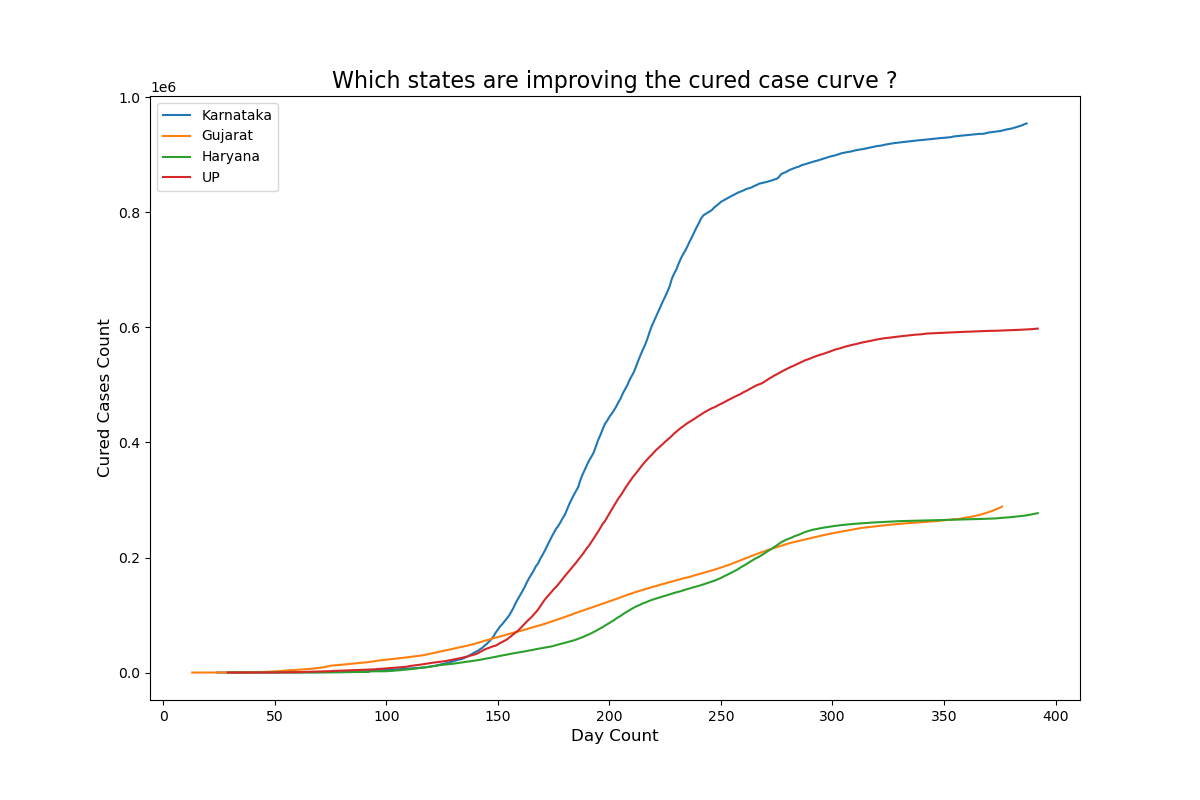

In [36]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kar['Day Count'], covid19_kar['Cured'])
plt.plot(covid19_guj['Day Count'], covid19_guj['Cured'])
plt.plot(covid19_har['Day Count'], covid19_har['Cured'])
plt.plot(covid19_uttar['Day Count'], covid19_uttar['Cured'])

plt.legend(['Karnataka', 'Gujarat','Haryana','UP'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Cured Cases Count', size=12)
plt.title('Which states are improving the cured case curve ?', size = 16)
plt.show()

# Part D
###  Compare the deaths due to Covid-19 in the months of May 2020 and May 2021 for the states namely Karnataka, Delhi, and Madhya Pradesh using stacked bars.

# karnataka 

In [74]:
covid19_Karnataka = covid19_df[covid19_df['State/UnionTerritory'] == "Karnataka"]
covid19_Karnataka.reset_index(inplace = True)
covid19_Karnataka = covid19_Karnataka.drop(['index','Sno', 'Time',
                                        'ConfirmedIndianNational',
                                            'ConfirmedForeignNational',
                                        'Cured', 'Confirmed'], axis = 1)
covid19_Karnataka.reset_index(inplace = True)
covid19_Karnataka.columns = ['Day Count', 'Date', 'State/UnionTerritory','Deaths' ]
print(covid19_Karnataka.shape)
covid19_Karnataka.head()


(520, 4)


,Day Count,Date,State/UnionTerritory,Deaths
0,0,2020-03-09,Karnataka,0
1,1,2020-03-10,Karnataka,0
2,2,2020-03-11,Karnataka,0
3,3,2020-03-12,Karnataka,0
4,4,2020-03-13,Karnataka,1


In [75]:
covid19_Karnataka.Date= pd.to_datetime(covid19_Karnataka.Date).dt.to_period('m')
print (covid19_Karnataka)

     Day Count     Date State/UnionTerritory  Deaths
0            0  2020-03            Karnataka       0
1            1  2020-03            Karnataka       0
2            2  2020-03            Karnataka       0
3            3  2020-03            Karnataka       0
4            4  2020-03            Karnataka       1
..         ...      ...                  ...     ...
515        515  2021-08            Karnataka   36741
516        516  2021-08            Karnataka   36773
517        517  2021-08            Karnataka   36793
518        518  2021-08            Karnataka   36817
519        519  2021-08            Karnataka   36848

[520 rows x 4 columns]


In [76]:
state1=covid19_Karnataka[(covid19_Karnataka['Date']==('2020-05')) ]
state1

,Day Count,Date,State/UnionTerritory,Deaths
53,53,2020-05,Karnataka,22
54,54,2020-05,Karnataka,22
55,55,2020-05,Karnataka,25
56,56,2020-05,Karnataka,26
57,57,2020-05,Karnataka,28
58,58,2020-05,Karnataka,29
59,59,2020-05,Karnataka,29
60,60,2020-05,Karnataka,30
61,61,2020-05,Karnataka,30
62,62,2020-05,Karnataka,30


In [77]:
m=state1['Deaths'].sum()

In [78]:
statea=covid19_Karnataka[(covid19_Karnataka['Date']==('2021-05')) ]
statea

,Day Count,Date,State/UnionTerritory,Deaths
418,418,2021-05,Karnataka,15523
419,419,2021-05,Karnataka,15794
420,420,2021-05,Karnataka,16011
421,421,2021-05,Karnataka,16250
422,422,2021-05,Karnataka,16538
423,423,2021-05,Karnataka,16884
424,424,2021-05,Karnataka,17212
425,425,2021-05,Karnataka,17804
426,426,2021-05,Karnataka,18286
427,427,2021-05,Karnataka,18776


In [79]:
n=statea['Deaths'].sum()

In [80]:
a=pd.concat([state1, statea], ignore_index=True, axis=0)
a

,Day Count,Date,State/UnionTerritory,Deaths
0,53,2020-05,Karnataka,22
1,54,2020-05,Karnataka,22
2,55,2020-05,Karnataka,25
3,56,2020-05,Karnataka,26
4,57,2020-05,Karnataka,28
...,...,...,...,...
57,444,2021-05,Karnataka,26929
58,445,2021-05,Karnataka,27405
59,446,2021-05,Karnataka,27806
60,447,2021-05,Karnataka,28298


# MP

In [83]:
covid19_mp = covid19_df[covid19_df['State/UnionTerritory'] == "Madhya Pradesh"]
covid19_mp.reset_index(inplace = True)
covid19_mp = covid19_mp.drop(['index','Sno', 'Time', 
                              'ConfirmedIndianNational', 
                              'ConfirmedForeignNational',
                              'Cured', 'Confirmed'], axis = 1)
covid19_mp.reset_index(inplace = True)
covid19_mp.columns = ['Day Count', 'Date', 'State/UnionTerritory','Deaths' ]
print(covid19_mp.shape)
covid19_mp.head()

(508, 4)


,Day Count,Date,State/UnionTerritory,Deaths
0,0,2020-03-21,Madhya Pradesh,0
1,1,2020-03-22,Madhya Pradesh,0
2,2,2020-03-23,Madhya Pradesh,0
3,3,2020-03-24,Madhya Pradesh,0
4,4,2020-03-25,Madhya Pradesh,0


In [86]:
covid19_mp.Date= pd.to_datetime(covid19_mp.Date).dt.to_period('m')
print (covid19_mp)

     Day Count     Date State/UnionTerritory  Deaths
0            0  2020-03       Madhya Pradesh       0
1            1  2020-03       Madhya Pradesh       0
2            2  2020-03       Madhya Pradesh       0
3            3  2020-03       Madhya Pradesh       0
4            4  2020-03       Madhya Pradesh       0
..         ...      ...                  ...     ...
503        503  2021-08       Madhya Pradesh   10514
504        504  2021-08       Madhya Pradesh   10514
505        505  2021-08       Madhya Pradesh   10514
506        506  2021-08       Madhya Pradesh   10514
507        507  2021-08       Madhya Pradesh   10514

[508 rows x 4 columns]


In [89]:
state2=covid19_mp[(covid19_mp['Date']==('2020-05')) ]
state2


,Day Count,Date,State/UnionTerritory,Deaths
41,41,2020-05,Madhya Pradesh,137
42,42,2020-05,Madhya Pradesh,145
43,43,2020-05,Madhya Pradesh,156
44,44,2020-05,Madhya Pradesh,165
45,45,2020-05,Madhya Pradesh,176
46,46,2020-05,Madhya Pradesh,176
47,47,2020-05,Madhya Pradesh,185
48,48,2020-05,Madhya Pradesh,193
49,49,2020-05,Madhya Pradesh,200
50,50,2020-05,Madhya Pradesh,215


In [90]:
o=state2['Deaths'].sum()

In [91]:
stateb=covid19_mp[(covid19_mp['Date']==('2021-05')) ]
stateb

,Day Count,Date,State/UnionTerritory,Deaths
406,406,2021-05,Madhya Pradesh,5616
407,407,2021-05,Madhya Pradesh,5718
408,408,2021-05,Madhya Pradesh,5812
409,409,2021-05,Madhya Pradesh,5905
410,410,2021-05,Madhya Pradesh,6003
411,411,2021-05,Madhya Pradesh,6074
412,412,2021-05,Madhya Pradesh,6160
413,413,2021-05,Madhya Pradesh,6244
414,414,2021-05,Madhya Pradesh,6334
415,415,2021-05,Madhya Pradesh,6420


In [92]:
p=stateb['Deaths'].sum()

# Delhi

In [84]:
covid19_del = covid19_df[covid19_df['State/UnionTerritory'] == "Delhi"]
covid19_del.reset_index(inplace = True)
covid19_del = covid19_del.drop(['index','Sno', 'Time', 
                                'ConfirmedIndianNational', 
                                'ConfirmedForeignNational',
                                'Cured', 'Confirmed'], axis = 1)
covid19_del.reset_index(inplace = True)
covid19_del.columns = ['Day Count', 'Date', 'State/UnionTerritory','Deaths' ]
print(covid19_del.shape)
covid19_del.head()

(528, 4)


,Day Count,Date,State/UnionTerritory,Deaths
0,0,2020-03-02,Delhi,0
1,1,2020-03-03,Delhi,0
2,2,2020-03-04,Delhi,0
3,3,2020-03-05,Delhi,0
4,4,2020-03-06,Delhi,0


In [94]:
covid19_del.Date= pd.to_datetime(covid19_del.Date).dt.to_period('m')
print (covid19_del)

     Day Count     Date State/UnionTerritory  Deaths
0            0  2020-03                Delhi       0
1            1  2020-03                Delhi       0
2            2  2020-03                Delhi       0
3            3  2020-03                Delhi       0
4            4  2020-03                Delhi       0
..         ...      ...                  ...     ...
523        523  2021-08                Delhi   25065
524        524  2021-08                Delhi   25066
525        525  2021-08                Delhi   25066
526        526  2021-08                Delhi   25067
527        527  2021-08                Delhi   25068

[528 rows x 4 columns]


In [95]:
state3=covid19_del[(covid19_del['Date']==('2020-05')) ]
state3


,Day Count,Date,State/UnionTerritory,Deaths
60,60,2020-05,Delhi,59
61,61,2020-05,Delhi,61
62,62,2020-05,Delhi,64
63,63,2020-05,Delhi,64
64,64,2020-05,Delhi,64
65,65,2020-05,Delhi,64
66,66,2020-05,Delhi,65
67,67,2020-05,Delhi,66
68,68,2020-05,Delhi,68
69,69,2020-05,Delhi,73


In [96]:
q=state3['Deaths'].sum()

In [100]:
statec=covid19_del[(covid19_del['Date']==('2021-05')) ]
statec


,Day Count,Date,State/UnionTerritory,Deaths
425,425,2021-05,Delhi,16147
426,426,2021-05,Delhi,16559
427,427,2021-05,Delhi,16966
428,428,2021-05,Delhi,17414
429,429,2021-05,Delhi,17752
430,430,2021-05,Delhi,18063
431,431,2021-05,Delhi,18398
432,432,2021-05,Delhi,18739
433,433,2021-05,Delhi,19071
434,434,2021-05,Delhi,19344


In [101]:
r=statec['Deaths'].sum()

<IPython.core.display.Javascript object>


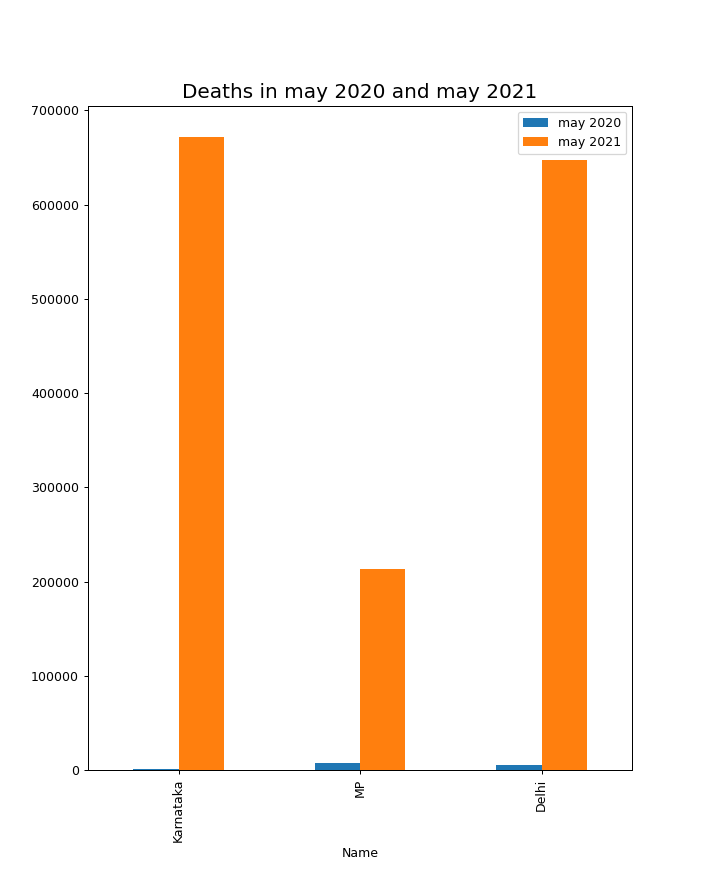

In [102]:
df = pd.DataFrame({
    'Name': ['Karnataka','MP','Delhi'],
    'may 2020':[m,o,q],
    'may 2021':[n,p,r]
  
})
  
# plotting graph
df.plot(x="Name", y=["may 2020", "may 2021"], kind="bar")
plt.title('Deaths in may 2020 and may 2021', size = 16)
plt.show()


# Part E

### Make a graph to show the  relation  between number of confirmed Covid-19 cases and Deaths in Uttar Pradesh.

In [103]:
covid19_up = covid19_df[covid19_df['State/UnionTerritory'] == "Uttar Pradesh"]
covid19_up.reset_index(inplace = True)
covid19_up = covid19_up.drop(['index','Sno', 'Time', 
                              'ConfirmedIndianNational', 
                              'ConfirmedForeignNational',
                                        'Cured'], axis = 1)
covid19_up.reset_index(inplace = True)
covid19_up.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed' ]
print(covid19_up.shape)
covid19_up.head()

(526, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,0,2020-03-04,Uttar Pradesh,0,6
1,1,2020-03-05,Uttar Pradesh,0,7
2,2,2020-03-06,Uttar Pradesh,0,7
3,3,2020-03-07,Uttar Pradesh,0,7
4,4,2020-03-08,Uttar Pradesh,0,7


<IPython.core.display.Javascript object>


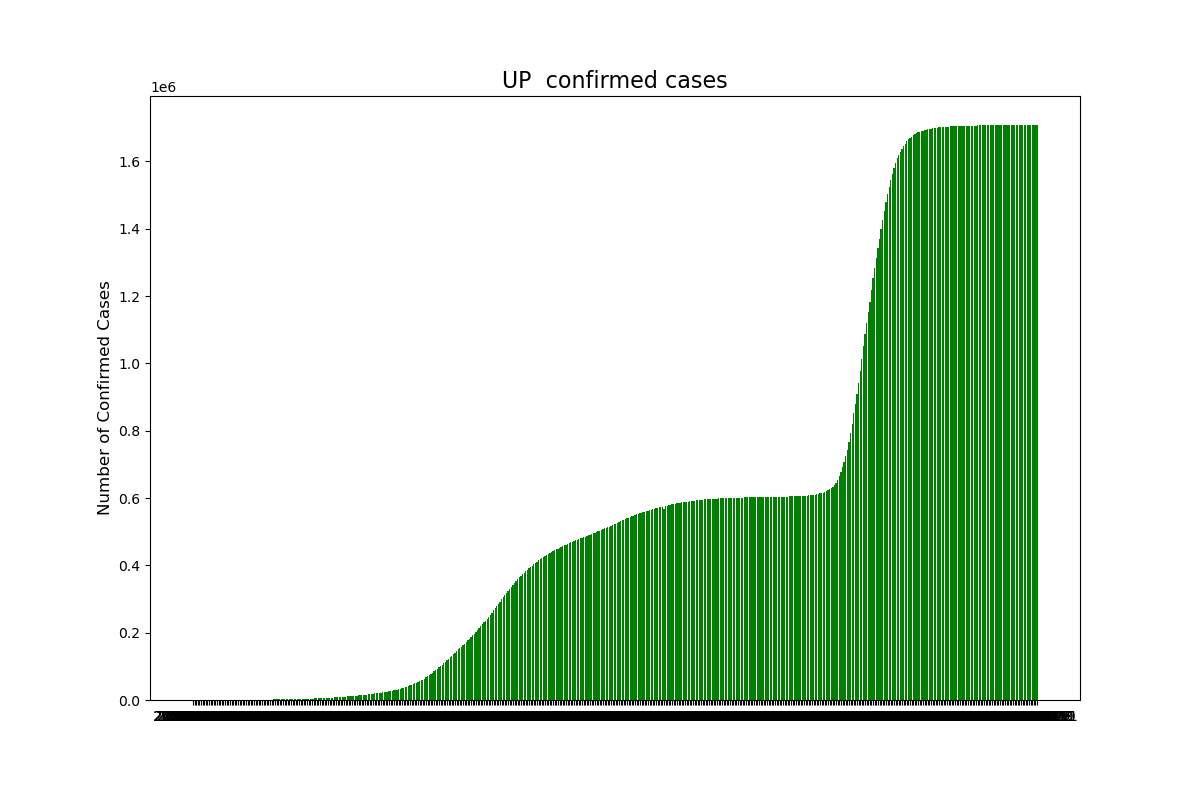

In [109]:
up = covid19_up.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_up['Date'], covid19_up['Confirmed'],
        align='center',color='Green')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('UP  confirmed cases', size = 16)
plt.show()

<IPython.core.display.Javascript object>


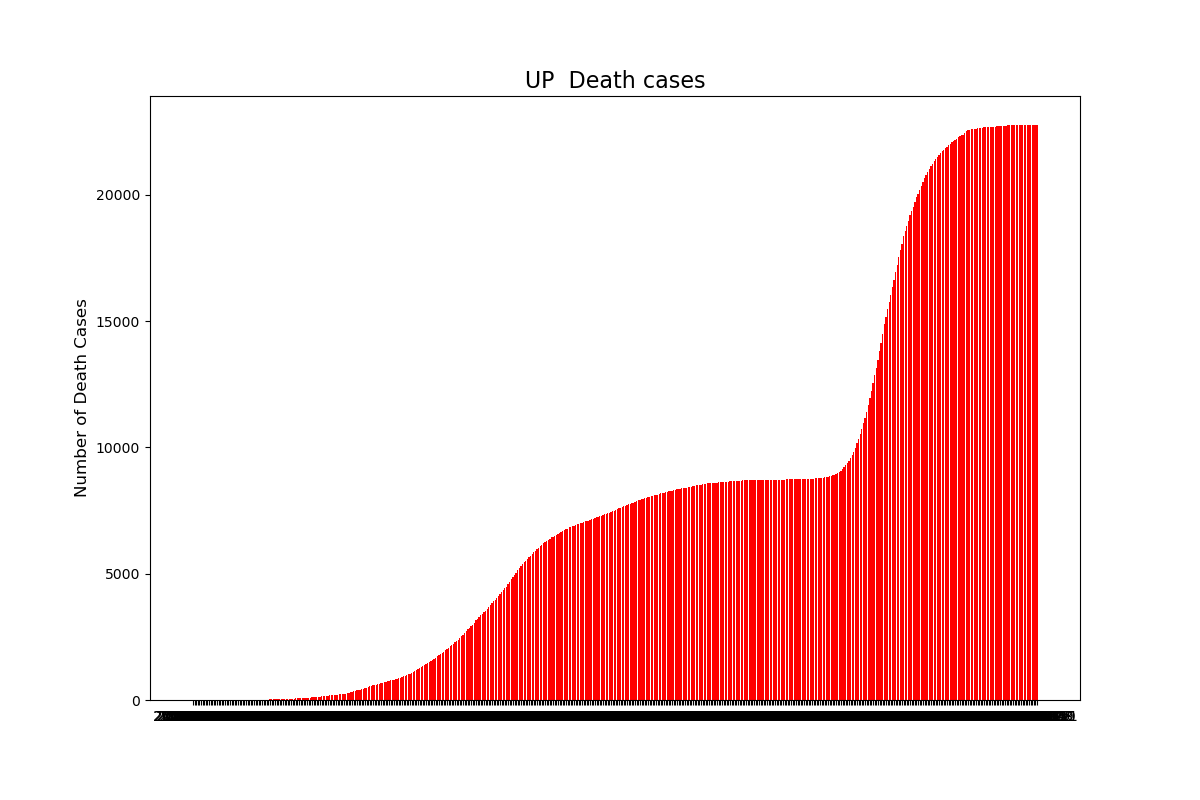

In [110]:
up = covid19_up.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(covid19_up['Date'], covid19_up['Deaths'],
        align='center',color='Red')
plt.ylabel('Number of Death Cases', size = 12)
plt.title('UP  Death cases', size = 16)
plt.show()

# End